In [2]:
import pandas as pd
import numpy as np
import math

In [27]:

FILE = "data/oct_interactions.csv"
OUTPUT_FILE = "data/oct_interactions_converted.csv"
OUTPUT_FILE_CAPPED = "data/oct_interactions_capped.csv"
MODEL_C = "data/interaction_model_c.csv" #Interaction models Full with sum
MODEL_D = "data/interaction_model_d.csv" #Interaction models shortened top 1000 0000

In [4]:

df = pd.read_csv(FILE)

In [5]:
df.columns

Index(['Unnamed: 0', 'user_productid', 'score', 'user', 'product_id'], dtype='object')

In [6]:
df['score'].unique()

array([   1,    2,    3,    4,    5,   16,    7,    8,   17,    9,   14,
          6,   11,   10,   26,   13,   15,   19,   18,   22,   12,   25,
         37,   31,   21,   23,   43,   24,   30,   20,   27,   33,   48,
         51,   28,   91,   32,   36,   29,   50,   49,   35,   66,   74,
         34,   53,   52,   55,   47,   86,   56,   41,   89,   38,   61,
         57,   60,   95,   59,  146,   45,   46,   81,   77,   39,   99,
         76,   68,  105,   40,   71,  155,  207,  140,   62,   84,  127,
         80,  116,   70,  144,  120,   44,  108,   42,  121,   64,   97,
        110,   72,  205,   73,   63,   79,   54,   65,   75,  157,   85,
        184,  132,  122,  485,  508,  166,  549,  314,   58,  151,  156,
        104,  109,  123,   88,  100,   69,  111,   82,  185,  102,   67,
        134,  161,  115,   90,  520,  256,  112,   83,  137,   78,  117,
        124,  103,  118,  107,  136,  106,  126,  160,  152,   93,  177,
        101,  174,  228,  225,  211,  206,  193,  1

In [7]:
df['score'].describe()

count    2.330763e+07
mean     2.028228e+00
std      3.639464e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.199000e+03
Name: score, dtype: float64

In [8]:
gb = df.groupby('score')
count_scores = gb['score'].count()

(0.0, 25.0)

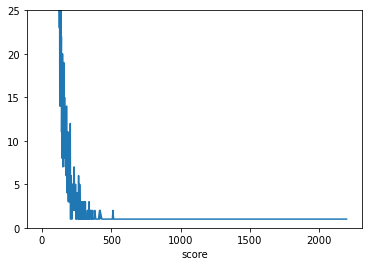

In [9]:
ax = count_scores.plot()
ax.set_ylim(0, 25)

In [20]:
ax.set_xlim(0, 25)

[]

In [10]:
def capper(score: int):
    """
    The idea is that it will be capping it in 10's
    """
    CAP:int = 10
    if score > CAP:
        return 10
    return score


    
    
    

In [11]:
df_capped = df
df_capped['score'] = df_capped['score'].apply(capper)

In [12]:
df_capped.head()

,Unnamed: 0,user_productid,score,user,product_id
0,0,183503497-22200103,1,183503497,22200103
1,1,184265397-27400002,2,184265397,27400002
2,2,184265397-6902133,2,184265397,6902133
3,3,184265397-6902303,2,184265397,6902303
4,4,195082191-4804056,1,195082191,4804056


In [17]:
df_capped['score'].unique()

array([ 1,  2,  3,  4,  5, 10,  7,  8,  9,  6], dtype=int64)

In [23]:
rows = ['score', 'user', 'product_id']

df_capped.head()[rows].to_csv(OUTPUT_FILE_CAPPED, index=False)

In [24]:

df_capped[rows].to_csv(OUTPUT_FILE, index=False)

In [26]:

df[rows].to_csv(MODEL_C, index=False)

In [28]:
df_capped[rows].head(1000000).to_csv(MODEL_D, index=False)

In [31]:
df_capped[rows].head()

,score,user,product_id
0,1,183503497,22200103
1,2,184265397,27400002
2,2,184265397,6902133
3,2,184265397,6902303
4,1,195082191,4804056
